In [1]:
!unzip Brain_tumor_dataset.zip -d Brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: Brain_tumor_dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: Brain_tumor_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers,models,regularizers
from tensorflow.keras.metrics import Precision, Recall

In [3]:
#Data preprocessing
image_size = (224, 224)
batch_size = 32
train_data="/content/Brain_tumor_dataset/Training"
test_data="/content/Brain_tumor_dataset/Testing"
val_split=0.2
seed=42
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=val_split,
    shear_range=0.1,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.9, 1.5]
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=val_split
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary'
    subset='training',
    seed=42,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary'
    subset='validation',
    seed=42,
    shuffle=False
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
from numpy._core.defchararray import add
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             

 Total params: 1,242,916 (4.74 MB)

 Trainable params: 1,240,996 (4.73 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [6]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,
    patience=3,
    min_lr=1e-7
)
checkpoint = ModelCheckpoint(
    'best_brain_tumor_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


In [8]:
history=model.fit(train_generator,
                  epochs=50,
                  validation_data=val_generator,
                  callbacks=[early_stop, reduce_lr, checkpoint],
                  verbose=1)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.5831 - loss: 1.7724 - precision: 0.6640 - recall: 0.4721
Epoch 1: val_accuracy improved from -inf to 0.41543, saving model to best_brain_tumor_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 122s 663ms/step - accuracy: 0.5837 - loss: 1.7712 - precision: 0.6646 - recall: 0.4728 - val_accuracy: 0.4154 - val_loss: 2.2001 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7796 - loss: 1.3403 - precision: 0.8154 - recall: 0.7330
Epoch 2: val_accuracy did not improve from 0.41543
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 475ms/step - accuracy: 0.7798 - loss: 1.3399 - precision: 0.8155 - recall: 0.7331 - val_accuracy: 0.3646 - val_loss: 3.1266 - val_precision: 0.3652 - val_recall: 0.3585 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8360 - loss: 1.2159 - precision: 0.8628 - recall: 0.7983
Epoch 3: val_accuracy improved from 0.41543 to 0.49693, saving model to best_brain_tumor_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 484ms/step - accuracy: 0.8361 - loss: 1.2157 - precision: 0.8629 - recall: 0.7984 - val_accuracy: 0.4969 - val_loss: 2.2966 - val_precision: 0.5038 - val_recall: 0.4645 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8653 - loss: 1.1193 - precision: 0.8807 - recall: 0.8438
Epoch 4: val_accuracy did not improve from 0.49693
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 474ms/step - accuracy: 0.8653 - loss: 1.1193 - precision: 0.8807 - recall: 0.8438 - val_accuracy: 0.4251 - val_loss: 3.8769 - val_precision: 0.4248 - val_recall: 0.4233 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8746 - loss: 1.0789 - precision: 0.8923 - recall: 0.8574
Epoch 5: val_accuracy did not improve from 0.49693
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 478ms/step - accuracy: 0.8746 - loss: 1.0790 - precision: 0.8922 - recall: 0.8573 - val_accuracy: 0.4522 - val_loss: 2.7642 - val_precision: 0.4573 - val_r

143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 485ms/step - accuracy: 0.8778 - loss: 1.0559 - precision: 0.8921 - recall: 0.8584 - val_accuracy: 0.6775 - val_loss: 1.6254 - val_precision: 0.7056 - val_recall: 0.6573 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.8850 - loss: 1.0242 - precision: 0.8981 - recall: 0.8638
Epoch 7: val_accuracy did not improve from 0.67748
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 487ms/step - accuracy: 0.8851 - loss: 1.0242 - precision: 0.8981 - recall: 0.8638 - val_accuracy: 0.6652 - val_loss: 1.6287 - val_precision: 0.6836 - val_recall: 0.6494 - learning_rate: 1.0000e-04
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8933 - loss: 0.9813 - precision: 0.9039 - recall: 0.8823
Epoch 8: val_accuracy improved from 0.67748 to 0.76074, saving model to best_brain_tumor_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 478ms/step - accuracy: 0.8933 - loss: 0.9814 - precision: 0.9039 - recall: 0.8823 - val_accuracy: 0.7607 - val_loss: 1.3803 - val_precision: 0.7958 - val_recall: 0.7239 - learning_rate: 1.0000e-04
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.8977 - loss: 0.9508 - precision: 0.9083 - recall: 0.8848
Epoch 9: val_accuracy improved from 0.76074 to 0.78878, saving model to best_brain_tumor_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 482ms/step - accuracy: 0.8976 - loss: 0.9509 - precision: 0.9082 - recall: 0.8848 - val_accuracy: 0.7888 - val_loss: 1.2849 - val_precision: 0.8016 - val_recall: 0.7756 - learning_rate: 1.0000e-04
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9000 - loss: 0.9395 - precision: 0.9097 - recall: 0.8880
Epoch 10: val_accuracy did not improve from 0.78878
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 473ms/step - accuracy: 0.9000 - loss: 0.9394 - precision: 0.9098 - recall: 0.8880 - val_accuracy: 0.5933 - val_loss: 2.0979 - val_precision: 0.5993 - val_recall: 0.5767 - learning_rate: 1.0000e-04
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.9073 - loss: 0.9064 - precision: 0.9163 - recall: 0.8977
Epoch 11: val_accuracy did not improve from 0.78878
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 485ms/step - accuracy: 0.9073 - loss: 0.9064 - precision: 0.9163 - recall: 0.8977 - val_accuracy: 0.7502 - val_loss: 1.3940 - val_precision: 0.7694 - v

143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 477ms/step - accuracy: 0.9251 - loss: 0.8227 - precision: 0.9317 - recall: 0.9181 - val_accuracy: 0.8177 - val_loss: 1.1617 - val_precision: 0.8318 - val_recall: 0.8019 - learning_rate: 3.0000e-05
Epoch 15/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.9320 - loss: 0.7945 - precision: 0.9364 - recall: 0.9272
Epoch 15: val_accuracy did not improve from 0.81770
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 479ms/step - accuracy: 0.9320 - loss: 0.7946 - precision: 0.9364 - recall: 0.9271 - val_accuracy: 0.8089 - val_loss: 1.1686 - val_precision: 0.8371 - val_recall: 0.7835 - learning_rate: 3.0000e-05
Epoch 16/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.9336 - loss: 0.7933 - precision: 0.9401 - recall: 0.9281
Epoch 16: val_accuracy improved from 0.81770 to 0.85276, saving model to best_brain_tumor_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 474ms/step - accuracy: 0.9336 - loss: 0.7932 - precision: 0.9400 - recall: 0.9281 - val_accuracy: 0.8528 - val_loss: 1.0712 - val_precision: 0.8624 - val_recall: 0.8352 - learning_rate: 3.0000e-05
Epoch 17/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.9325 - loss: 0.7927 - precision: 0.9370 - recall: 0.9253
Epoch 17: val_accuracy did not improve from 0.85276
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 478ms/step - accuracy: 0.9325 - loss: 0.7925 - precision: 0.9371 - recall: 0.9254 - val_accuracy: 0.8291 - val_loss: 1.1197 - val_precision: 0.8351 - val_recall: 0.8212 - learning_rate: 3.0000e-05
Epoch 18/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.9388 - loss: 0.7700 - precision: 0.9440 - recall: 0.9348
Epoch 18: val_accuracy did not improve from 0.85276
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 474ms/step - accuracy: 0.9388 - loss: 0.7699 - precision: 0.9440 - recall: 0.9348 - val_accuracy: 0.8440 - val_loss: 1.0597 - val_precision: 0.8523 - v

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

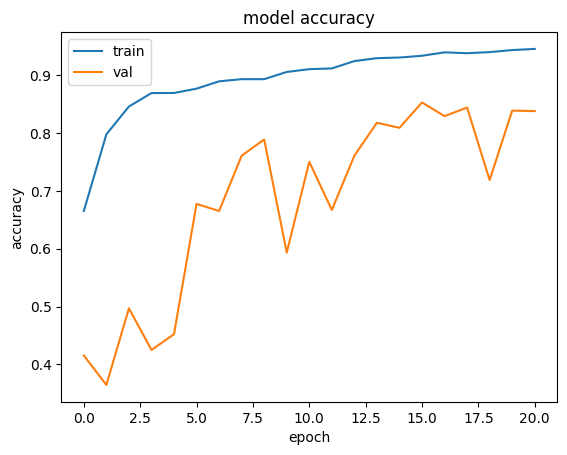

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt

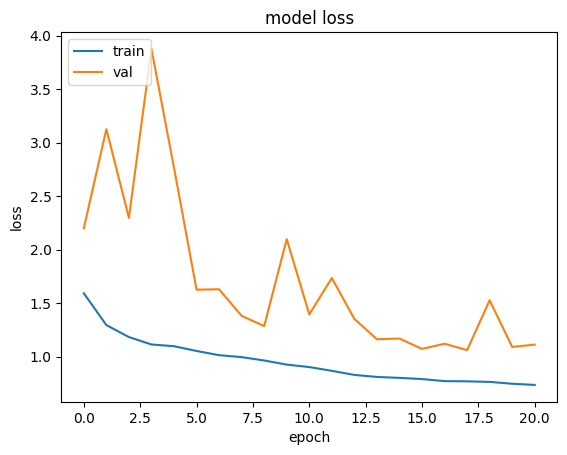

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
evaluation_results = model.evaluate(test_generator)
test_loss = evaluation_results[0]
test_acc = evaluation_results[1]
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.8313 - loss: 1.0915 - precision: 0.8416 - recall: 0.8102
Test Accuracy: 0.8756674528121948
Test Loss: 0.9748238921165466


In [12]:
pred_probs = model.predict(test_generator)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step


In [13]:
pred_classes = np.argmax(pred_probs, axis=1)
print(pred_classes)
print(pred_classes.shape)


[0 0 0 ... 3 3 3]
(1311,)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_classes, pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

      glioma       0.89      0.88      0.89       300
  meningioma       0.89      0.60      0.72       306
     notumor       0.89      0.99      0.93       405
   pituitary       0.84      0.99      0.91       300

    accuracy                           0.88      1311
   macro avg       0.88      0.87      0.86      1311
weighted avg       0.88      0.88      0.87      1311



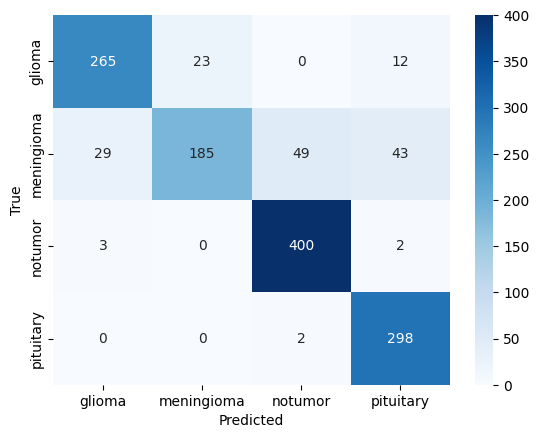

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Number of wrong predictions: 163


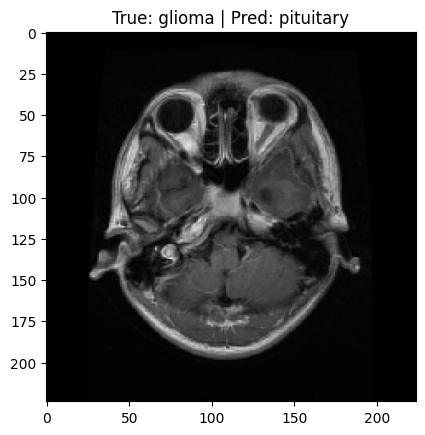

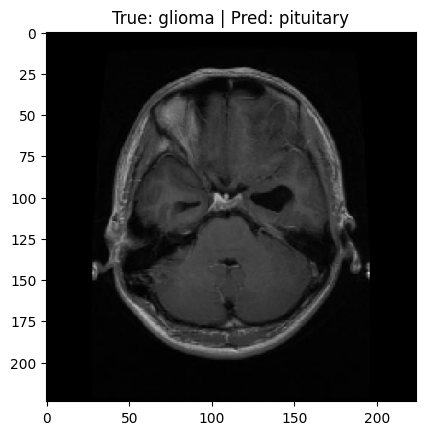

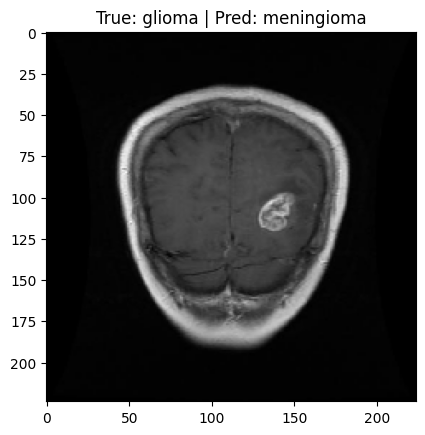

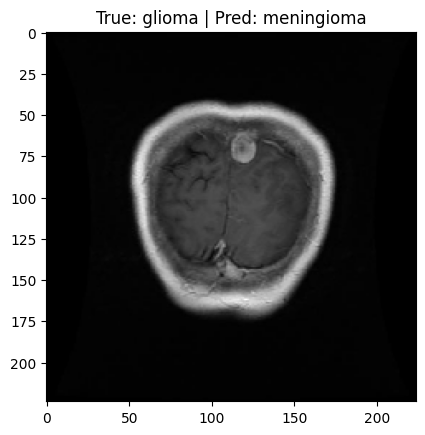

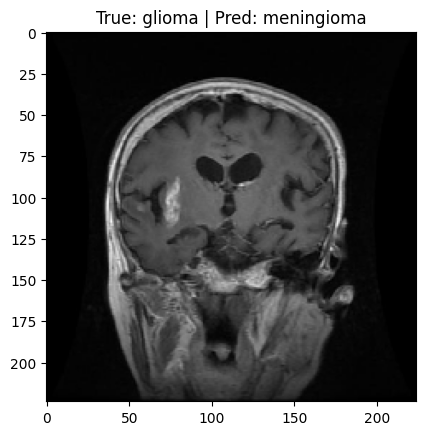

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

errors = np.where(pred_classes != true_classes)[0]
print("Number of wrong predictions:", len(errors))

# Get class names from the generator
class_labels = list(test_generator.class_indices.keys())

# Get the directory path for the test data
test_data_dir = test_generator.directory


filenames = test_generator.filenames

for i in errors[:5]:

    misclassified_filename = filenames[i]

    # Construct the full path to the image
    img_path = f"{test_data_dir}/{misclassified_filename}"

    # Load and resize the image
    img = image.load_img(img_path, target_size=image_size) # image_size is (224, 224) from previous cell

    # Display the image
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_classes[i]]} | Pred: {class_labels[pred_classes[i]]}")
    plt.show()


In [ ]:
import numpy as np

# 1. Predicting on the whole validation set
y_prob = model.predict(val_generator)
y_pred = np.argmax(y_prob, axis=1)
y_true = val_generator.classes
filenames = val_generator.filenames

# 2. Indices of misclassified samples
mis_idx = np.where(y_pred != y_true)[0]
print("Number of misclassified images:", len(mis_idx))


conf_wrong = np.max(y_prob[mis_idx], axis=1)
sorted_mis_idx = mis_idx[np.argsort(-conf_wrong)]


In [19]:
import os

plot_dir = "multi class"
os.makedirs(plot_dir, exist_ok=True)


In [21]:
import matplotlib.pyplot as plt

#  Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.savefig(f"{plot_dir}/accuracy.png", dpi=300, bbox_inches='tight')
plt.close()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig(f"{plot_dir}/loss.png", dpi=300, bbox_inches='tight')
plt.close()


In [22]:
import shutil

shutil.make_archive("multi_class_plot", 'zip', plot_dir)


'/content/multi_class_plot.zip'